# Case

Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. This data set is wide ranging in the sense it encompass stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal.

# Goals

## Whether the data is clean?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv")
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
Team                             20 non-null object
category                         20 non-null object
general_league_position          20 non-null int64
finance _live_games_televised    20 non-null int64
finance _tv_revenue              20 non-null int64
general_matches_played           20 non-null int64
general_won                      20 non-null int64
general_draw                     20 non-null int64
general_lost                     20 non-null int64
attack_scored                    20 non-null int64
defence_goals_conceeded          20 non-null int64
general_goal_difference          20 non-null int64
general_points                   20 non-null int64
general_squad_size               20 non-null int64
general_squad_average_age        20 non-null float64
general_squad_foreigners         20 non-null int64
finance _team_market             20 non-null int64
finance _market_average   

Looks like there is no missing value, but some of the data type are incorrect. Therefore, these columns could be converted into integer.

In [3]:
get_columns_object = []
for column in df.columns:
    if (df[column].dtype == "O") & (type(df[column].values[0])!="str"):
        get_columns_object.append(column)
df[get_columns_object]

,Team,category,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
0,Manchester City,Champions League,"26,581","1,814","4,240",543
1,Liverpool,Champions League,"23,638","2,250","3,416",639
2,Chelsea,Champions League Qualification,"25,070","1,774","3,874",593
3,Tottenham,Champions League Qualification,"21,295","2,267","3,191",770
4,Arsenal,Europa League,"20,805","2,062","3,102",762
5,Manchester United,Europa League,"19,202","2,242","2,634",785
6,Wolverhampton,Europa League Qualification,"16,618","2,552","2,515",824
7,Everton,No UEFA Competitions,"16,494","2,310","2,362",825
8,Leicester,No UEFA Competitions,"17,219","2,335","2,593",945
9,West Ham,No UEFA Competitions,"16,358","2,315","2,273",855


In [4]:
get_columns_object.remove("Team")
get_columns_object.remove("category")

attack_passes, attack_passes_long, attack_passes_back, and defence_clearences could be converted as below

In [5]:
# Remove comma
df[get_columns_object] = df[get_columns_object].apply(lambda x: x.str.replace(',',''))

# Convert the data type
df[get_columns_object] = df[get_columns_object].astype('int')

df[get_columns_object].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
attack_passes         20 non-null int32
attack_passes_long    20 non-null int32
attack_passes_back    20 non-null int32
defence_clearances    20 non-null int32
dtypes: int32(4)
memory usage: 448.0 bytes


In [6]:
df.describe()

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,17433.100000,58.700000,2333.850000,2590.650000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,862.600000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,4192.193659,33.625022,284.745182,679.843115,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,166.150661,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,10226.000000,15.000000,1774.000000,1418.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,543.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,15006.500000,34.500000,2248.000000,2192.750000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,768.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,16426.000000,50.500000,2325.000000,2427.000000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,888.000000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,19602.750000,78.000000,2522.750000,2838.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,972.750000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.9

The dataset wasn't clean. But in my opinion, now the dataset is clean. Now we can do further analysis.

## How is the point distribution of the epl team? and which team is an anomaly?  
As much as I know, the rule of points are as below:  
- Win = +3 Points
- Draw = +1 Point
- Lose = +0 Point  

We can check if there's any miscalculation from the point variables

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Function to find column name with specific string
def get_column_with_string(text):
    array = df.columns.str.contains(text)
    column_index = np.where(array==True)
    return df.columns[column_index]

In [9]:
# Get colum containing 'point' string
get_column_with_string("point")

Index(['general_points'], dtype='object')

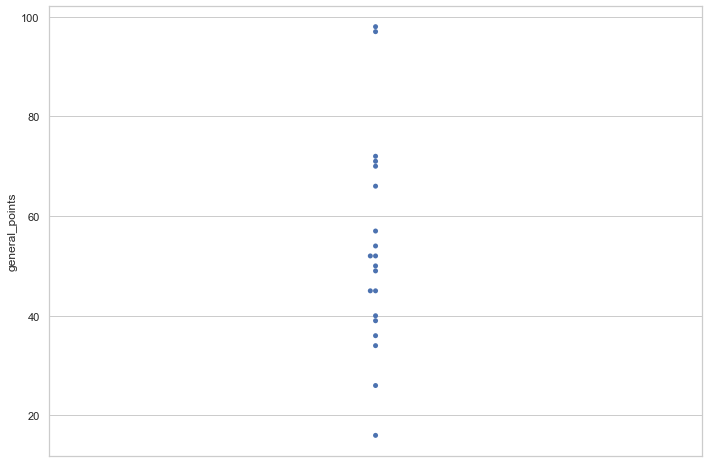

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.swarmplot(y="general_points",data=df)
plt.show()

The plot above, about general_points column, seemed normal. Let's make it sure if there's an anomaly in this column. The calculation needed would be finding if the 'general_points' column is different from the calculation below:

    total_points = 3*'general_won' + 'general_draw'
    
and finding if the 'general_matches_played' column is different from below calculation:
    
    total_play = 'general_won' + 'general_draw' + 'general_lost'

In [11]:
# Check if the team has an anomaly
for index,row in df.iterrows():
    total_play = row['general_won'] + row['general_draw'] + row['general_lost']
    total_point = 3*row['general_won'] + row['general_draw']
    if (row['general_points'] == total_point) and row['general_matches_played'] == total_play:
        print("There's no point anomaly from",row["Team"])
    else:
        print("There's an anomaly from",row["Team"])

There's no point anomaly from Manchester City
There's no point anomaly from Liverpool
There's no point anomaly from Chelsea
There's no point anomaly from Tottenham
There's no point anomaly from Arsenal
There's no point anomaly from Manchester United
There's no point anomaly from Wolverhampton
There's no point anomaly from Everton
There's no point anomaly from Leicester
There's no point anomaly from West Ham
There's no point anomaly from Watford
There's no point anomaly from Crystal Palace
There's no point anomaly from Newcastle
There's no point anomaly from  Bournemouth
There's no point anomaly from Burnley
There's no point anomaly from Southampton
There's no point anomaly from Brighton
There's no point anomaly from Cardiff
There's no point anomaly from Fulham
There's no point anomaly from Huddersfield


In [12]:
df[['Team','general_won','general_draw','general_lost','general_points']]

,Team,general_won,general_draw,general_lost,general_points
0,Manchester City,32,2,4,98
1,Liverpool,30,7,1,97
2,Chelsea,21,9,8,72
3,Tottenham,23,2,13,71
4,Arsenal,21,7,10,70
5,Manchester United,19,9,10,66
6,Wolverhampton,16,9,13,57
7,Everton,15,9,14,54
8,Leicester,15,7,16,52
9,West Ham,15,7,16,52


In [13]:
# Get correlation of the above columns
df[['general_won','general_draw','general_lost','general_points']].corr()

,general_won,general_draw,general_lost,general_points
general_won,1.000000,-0.355612,-0.941341,0.994055
general_draw,-0.355612,1.000000,0.019354,-0.251731
general_lost,-0.941341,0.019354,1.000000,-0.972488
general_points,0.994055,-0.251731,-0.972488,1.000000


According to the above analysis, there is no anomaly on general_points column. Even though there are some team with too high points or too low points, there's no sign that these values are an outlier or an invalid value. Even when using correlation analysis, it's valid if 'general_won' and 'general_points' columns has positive correlation. So, I don't think there's any anomaly in this point.

## Which team has the best attack?

Here, I'd like to find the average value of every team by calculating every columns containing "attack" word. Then, find a team with the highest average attack.  
To make the calculation much more distributed and easier to read, let's normalize the data first.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
scaler = MinMaxScaler()

# Get column containing 'attack' string
attack_columns = get_column_with_string("attack")

# Create new dataframe containing team names and attack columns
attack_df = df[['Team']]
attack_df = pd.concat([attack_df,pd.DataFrame(scaler.fit_transform(df[attack_columns]),
                                              columns=attack_columns)],axis=1)
attack_df.head()

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Manchester City,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,0.533333,0.222222,0.940299,1.000000,0.555556,0.666667,1.000000,1.000000
1,Liverpool,0.917808,0.820055,0.633588,0.423488,0.708009,0.630952,0.689873,0.665635,0.776316,1.000000,0.666667,1.000000,0.285714,0.666667,0.333333,0.791165,0.816733
2,Chelsea,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.111111,0.333333,0.835341,0.944223
3,Tottenham,0.616438,0.676796,0.549618,0.438612,0.628278,0.321429,0.341772,0.547988,0.532895,0.666667,0.333333,0.537313,0.928571,0.555556,0.666667,0.706827,0.768924
4,Arsenal,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.333333,1.000000,0.682731,0.772908


Seems like the more value on every column is, the higher the final attack score would be. Let's make it sure by using correlation analysis, whether to find if every variables correlation are mostly positive.

In [15]:
attack_df.corr()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
attack_scored,1.000000,0.817732,0.725372,-0.692815,0.764238,0.203544,0.859992,0.804922,0.889678,0.396272,0.354105,0.977570,0.573268,0.454484,0.359218,0.849823,0.751870
attack_passes,0.817732,1.000000,0.824348,-0.756387,0.986540,0.336950,0.778956,0.863581,0.844993,0.321640,0.214261,0.780969,0.536665,0.339286,0.353208,0.987926,0.958513
attack_passes_through,0.725372,0.824348,1.000000,-0.719131,0.800251,0.333154,0.692783,0.817177,0.777863,0.319733,0.206044,0.705298,0.424755,0.314547,0.287656,0.813384,0.741452
attack_passes_long,-0.692815,-0.756387,-0.719131,1.000000,-0.711326,-0.066151,-0.736721,-0.771446,-0.737761,0.038654,-0.414866,-0.614405,-0.640159,-0.387463,-0.281401,-0.769474,-0.759779
attack_passes_back,0.764238,0.986540,0.800251,-0.711326,1.000000,0.370631,0.748911,0.841247,0.789096,0.320649,0.110160,0.727225,0.510180,0.287276,0.342375,0.965718,0.934385
attack_crosses,0.203544,0.336950,0.333154,-0.066151,0.370631,1.000000,0.418022,0.370218,0.334369,0.486685,-0.275479,0.190848,0.172591,0.145297,0.141037,0.369968,0.283103
attack_corners_taken,0.859992,0.778956,0.692783,-0.736721,0.748911,0.418022,1.000000,0.913899,0.887884,0.280340,0.285044,0.811066,0.614041,0.406392,0.444626,0.803268,0.717903
attack_shots,0.804922,0.863581,0.817177,-0.771446,0.841247,0.370218,0.913899,1.000000,0.929259,0.208841,0.286392,0.733233,0.670405,0.305170,0.459303,0.865745,0.799261
attack_shots_on_target,0.889678,0.844993,0.777863,-0.737761,0.789096,0.334369,0.887884,0.929259,1.000000,0.239350,0.357834,0.831344,0.658691,0.444413,0.438422,0.870274,0.801613
attack_goals_headed,0.396272,0.321640,0.319733,0.038654,0.320649,0.486685,0.280340,0.208841,0.239350,1.000000,-0.137618,0.494860,-0.174978,0.411612,-0.269456,0.320640,0.256828


There is 1 column has relatively negative correlation compared to the others, which is attack_passes_long column. Let's make the value of this column as 1 - attack_passes_long, which would tell a lower attack_passes_long means the better.

In [16]:
attack_df["attack_passes_long"] = 1 - attack_df["attack_passes_long"]
attack_df.corr()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
attack_scored,1.000000,0.817732,0.725372,0.692815,0.764238,0.203544,0.859992,0.804922,0.889678,0.396272,0.354105,0.977570,0.573268,0.454484,0.359218,0.849823,0.751870
attack_passes,0.817732,1.000000,0.824348,0.756387,0.986540,0.336950,0.778956,0.863581,0.844993,0.321640,0.214261,0.780969,0.536665,0.339286,0.353208,0.987926,0.958513
attack_passes_through,0.725372,0.824348,1.000000,0.719131,0.800251,0.333154,0.692783,0.817177,0.777863,0.319733,0.206044,0.705298,0.424755,0.314547,0.287656,0.813384,0.741452
attack_passes_long,0.692815,0.756387,0.719131,1.000000,0.711326,0.066151,0.736721,0.771446,0.737761,-0.038654,0.414866,0.614405,0.640159,0.387463,0.281401,0.769474,0.759779
attack_passes_back,0.764238,0.986540,0.800251,0.711326,1.000000,0.370631,0.748911,0.841247,0.789096,0.320649,0.110160,0.727225,0.510180,0.287276,0.342375,0.965718,0.934385
attack_crosses,0.203544,0.336950,0.333154,0.066151,0.370631,1.000000,0.418022,0.370218,0.334369,0.486685,-0.275479,0.190848,0.172591,0.145297,0.141037,0.369968,0.283103
attack_corners_taken,0.859992,0.778956,0.692783,0.736721,0.748911,0.418022,1.000000,0.913899,0.887884,0.280340,0.285044,0.811066,0.614041,0.406392,0.444626,0.803268,0.717903
attack_shots,0.804922,0.863581,0.817177,0.771446,0.841247,0.370218,0.913899,1.000000,0.929259,0.208841,0.286392,0.733233,0.670405,0.305170,0.459303,0.865745,0.799261
attack_shots_on_target,0.889678,0.844993,0.777863,0.737761,0.789096,0.334369,0.887884,0.929259,1.000000,0.239350,0.357834,0.831344,0.658691,0.444413,0.438422,0.870274,0.801613
attack_goals_headed,0.396272,0.321640,0.319733,-0.038654,0.320649,0.486685,0.280340,0.208841,0.239350,1.000000,-0.137618,0.494860,-0.174978,0.411612,-0.269456,0.320640,0.256828


Finally, get the average attack value for every teams

In [17]:
attack_df["avg_attack"] = attack_df.mean(axis=1)
attack_df[["Team","avg_attack"]]

,Team,avg_attack
0,Manchester City,0.852937
1,Liverpool,0.704649
2,Chelsea,0.632101
3,Tottenham,0.584733
4,Arsenal,0.528769
5,Manchester United,0.529246
6,Wolverhampton,0.373354
7,Everton,0.430639
8,Leicester,0.542208
9,West Ham,0.359461


So, team which has the highest avg_attack is Manchester City with the value is 0.852937

## Which team has the best defence?  
I'm going to do the same as before. but this time, I’m finding a team with the highest defence by using only 'defence_goals_conceeded' and 'defence_penalty_conceeded'. This is because every team doesn't want to be conceeded. The lower the value of these columns would be the better.

In [18]:
# Get column names containing "conceeded" string
defence_columns = get_column_with_string("conceeded")

# Create dataframe about defence
defence_df = df[['Team']]
defence_df = pd.concat([defence_df,pd.DataFrame(scaler.fit_transform(df[defence_columns]),
                                              columns=defence_columns)],axis=1)
defence_df.sort_values('defence_goals_conceeded').head(10)

,Team,defence_goals_conceeded,defence_penalty_conceeded
1,Liverpool,0.000000,0.000000
0,Manchester City,0.016949,0.333333
2,Chelsea,0.288136,0.111111
3,Tottenham,0.288136,0.444444
6,Wolverhampton,0.406780,0.333333
7,Everton,0.406780,0.444444
8,Leicester,0.440678,0.444444
12,Newcastle,0.440678,0.666667
4,Arsenal,0.491525,0.666667
11,Crystal Palace,0.525424,0.444444


This time, the lower the value, the higher the final defence score would be. It could be known from both columns, where Liverpool as one of the best performing team having 0 value of it. I'd like to inverse every column value by using recalculate it as below:

    new_value = 1 - old_value  
    
So, it would be easier to find a team with the highest average defence. Before we do that, let's find the correlation first.

In [19]:
defence_df.corr()

,defence_goals_conceeded,defence_penalty_conceeded
defence_goals_conceeded,1.000000,0.585704
defence_penalty_conceeded,0.585704,1.000000


Most of the correlation tends to be positive. So it's safe to do the next step.

In [20]:
# Inverse the value
defence_df["avg_def"] = 1 - defence_df.mean(axis=1)
defence_df[["Team","avg_def"]].sort_values('avg_def',ascending=False)

,Team,avg_def
1,Liverpool,1.000000
0,Manchester City,0.824859
2,Chelsea,0.800377
3,Tottenham,0.633710
6,Wolverhampton,0.629944
7,Everton,0.574388
8,Leicester,0.557439
15,Southampton,0.524482
11,Crystal Palace,0.515066
9,West Ham,0.498117


So, team which has the best defence is Liverpool, with average defence status is 1.0.

## Which team is good in financial aspect?  
The same procedure as previous can be done as well. But, we could take a few teams by finding the Top 20% teams with the highest average financial aspect.

In [21]:
finance_columns = get_column_with_string("finance")

finance_df = df[['Team']]
finance_df = pd.concat([finance_df,pd.DataFrame(scaler.fit_transform(df[finance_columns]),
                                              columns=finance_columns)],axis=1)
finance_df.head(10)

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,0.842105,0.974213,1.000000,1.000000
1,Liverpool,1.000000,1.000000,0.818286,0.860853
2,Chelsea,0.789474,0.885388,0.756197,0.729092
3,Tottenham,0.842105,0.871060,0.708012,0.713605
4,Arsenal,0.789474,0.816619,0.671573,0.648082
5,Manchester United,0.894737,0.822349,0.506640,0.513462
6,Wolverhampton,0.263158,0.547281,0.309584,0.352395
7,Everton,0.421053,0.573068,0.239584,0.235406
8,Leicester,0.263158,0.478512,0.216570,0.213248
9,West Ham,0.315789,0.464185,0.162056,0.161306


It's mostly the same as the 'attack' columns, which the higher the value, the better it would be.

In [22]:
finance_df.corr()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
finance _live_games_televised,1.000000,0.946232,0.907909,0.915726
finance _tv_revenue,0.946232,1.000000,0.945133,0.948347
finance _team_market,0.907909,0.945133,1.000000,0.997373
finance _market_average,0.915726,0.948347,0.997373,1.000000


Because the correlation of every columns is positive, it's safe to find the average of each finance column for every teams.

In [23]:
finance_df["avg_finance"] = finance_df.mean(axis=1)
finance_df[["Team","avg_finance"]].sort_values('avg_finance',ascending=False)

,Team,avg_finance
0,Manchester City,0.954080
1,Liverpool,0.919785
2,Chelsea,0.790038
3,Tottenham,0.783696
4,Arsenal,0.731437
5,Manchester United,0.684297
6,Wolverhampton,0.368104
7,Everton,0.367278
12,Newcastle,0.310509
8,Leicester,0.292872


So, Manchester City holds the best in financial aspect. But if we were to find the good teams, let's find which team has the top 20% in financial aspect.

In [24]:
finance_percentile_80 = np.percentile(finance_df[["avg_finance"]],80)
print("avg_finance Percentile 80 is",round(finance_percentile_80,5))
finance_df[finance_df['avg_finance']>=finance_percentile_80][['Team',"avg_finance"]].sort_values('avg_finance',ascending=False)

avg_finance Percentile 80 is 0.74189


,Team,avg_finance
0,Manchester City,0.954080
1,Liverpool,0.919785
2,Chelsea,0.790038
3,Tottenham,0.783696


Therefore, Manchester City, Liverpool, Chelsea, and Tottenham has relatively good in terms of finance.

## Explore your Creativity!  
Here, I'd like to create and test some machine learning models which predicts all finance columns all the other available columns (except Team and general_league_position ).

In [25]:
# Remove unnecessary columns
ml_data = df.drop(['Team','general_league_position'],axis=1)
ml_data.head()

,category,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Champions League,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Champions League,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Champions League Qualification,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774,3874,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Champions League Qualification,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267,3191,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Europa League,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062,3102,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [26]:
# One hot encode category column
ohe_ml_data = pd.get_dummies(df['category']).drop("Relegated",axis=1)

preprocessed_ml_data = ml_data.drop('category',axis=1)
preprocessed_ml_data = pd.concat([preprocessed_ml_data,ohe_ml_data],axis=1)

# Rescale every column
preprocessed_ml_data = pd.DataFrame(scaler.fit_transform(preprocessed_ml_data),columns=preprocessed_ml_data.columns)
preprocessed_ml_data

,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,Champions League,Champions League Qualification,Europa League,Europa League Qualification,No UEFA Competitions
0,0.842105,0.974213,0.0,1.000000,0.0,0.111111,1.000000,0.016949,1.000000,1.000000,0.625,0.277778,0.588235,1.000000,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,0.533333,0.222222,0.940299,1.000000,0.153846,0.2,0.555556,0.666667,0.000000,0.000000,0.205128,0.000000,0.000,0.000000,0.154088,0.333333,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0
1,1.000000,1.000000,0.0,0.931034,0.5,0.000000,0.917808,0.000000,0.960317,0.987805,0.500,0.194444,0.352941,0.818286,0.860853,0.820055,0.633588,0.423488,0.708009,0.630952,0.689873,0.665635,0.776316,1.000000,0.666667,1.000000,0.285714,0.000000,0.4,0.666667,0.333333,0.200000,0.094340,0.000000,0.433962,0.250,0.166378,0.223270,0.000000,0.791165,0.816733,1.0,0.0,0.0,0.0,0.0
2,0.789474,0.885388,0.0,0.620690,0.7,0.259259,0.561644,0.288136,0.619048,0.682927,0.750,0.555556,0.529412,0.756197,0.729092,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.282051,0.0,0.111111,0.333333,0.300000,0.062893,0.158120,0.471698,0.250,0.086655,0.264151,0.111111,0.835341,0.944223,0.0,1.0,0.0,0.0,0.0
3,0.842105,0.871060,0.0,0.689655,0.0,0.444444,0.616438,0.288136,0.650794,0.670732,0.625,0.250000,0.411765,0.708012,0.713605,0.676796,0.549618,0.438612,0.628278,0.321429,0.341772,0.547988,0.532895,0.666667,0.333333,0.537313,0.928571,0.461538,0.6,0.555556,0.666667,0.700000,0.308176,0.051282,0.509434,0.375,0.393414,0.518868,0.444444,0.706827,0.768924,0.0,1.0,0.0,0.0,0.0
4,0.789474,0.816619,0.0,0.620690,0.5,0.333333,0.698630,0.491525,0.603175,0.658537,0.750,0.388889,0.470588,0.671573,0.648082,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.871795,0.4,0.333333,1.000000,0.833333,0.345912,0.418803,0.429245,0.250,0.379549,0.496855,0.666667,0.682731,0.772908,0.0,0.0,1.0,0.0,0.0
5,0.894737,0.822349,0.0,0.551724,0.7,0.333333,0.589041,0.542373,0.515873,0.609756,0.750,0.333333,0.647059,0.506640,0.513462,0.548823,0.366412,0.416370,0.430900,0.301587,0.379747,0.513932,0.769737,0.000000,0.888889,0.567164,0.642857,0.897436,0.8,0.444444,0.666667,0.711111,0.408805,0.175214,0.297170,0.250,0.419411,0.389937,0.555556,0.570281,0.733068,0.0,0.0,1.0,0.0,0.0
6,0.263158,0.547281,0.0,0.448276,0.7,0.444444,0.342466,0.406780,0.436508,0.500000,0.375,0.305556,0.176471,0.309584,0.352395,0.390828,0.274809,0.692171,0.388731,0.238095,0.348101,0.362229,0.289474,0.400000,0.333333,0.402985,0.142857,0.871795,0.2,0.555556,0.666667,0.466667,0.534591,0.799145,0.952830,0.250,0.487002,0.685535,0.333333,0.333333,0.569721,0.0,0.0,0.0,1.0,0.0
7,0.421053,0.573068,0.0,0.413793,0.7,0.481481,0.438356,0.406780,0.492063,0.463415,0.750,0.250000,0.352941,0.239584,0.235406,0.383247,0.221374,0.476868,0.334515,1.000000,0.474684,0.427245,0.401316,0.600000,0.111111,0.417910,0.642857,0.435897,0.8,0.333333,0.000000,0.400000,0.138365,0.606838,0.858491,0.500,0.488735,0.578616,0.444444,0.477912,0.533865,0.0,0.0,0.0,0.0,1.0
8,0.263158,0.478512,0.0,0.413793,0.5,0.555556,0.397260,0.440678,0.452381,0.439024,0.750,0.805556,0.470588,0.216570,0

In [27]:
# Attribute variable
X = preprocessed_ml_data.drop(finance_columns.values,axis=1)

# Target variable
y = preprocessed_ml_data[finance_columns]

# Scaler for target variable only, to check its error
new_scaler = MinMaxScaler().fit(ml_data[finance_columns])
mape_score = None

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor

# Function to train model
def train_model(clf, params, mode):
    # Because there are 4 outputs, MultiOutputRegressor is used
    if mode == "multi":
        clf = MultiOutputRegressor(clf)
    # Hyperparameter tuning + cross validation object
    model = RandomizedSearchCV(estimator = clf,
                                   param_distributions = params,
                                   cv = 3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs = -1)
    # Train model
    model.fit(X,y)
    return model

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

# Function to get MAPE for each model
def get_mape(clf,clf_name):
    # Predict using train data
    y_pred = clf.predict(X)
    
    # MAPE score dataframe
    mape_df = pd.DataFrame([clf_name],columns=["Model"])
    
    # Find MAPE for every finance columns
    for i in range(4):
        # Calculate MAPE for specific finance column
        mape = pd.Series(mean_absolute_percentage_error(pd.DataFrame(new_scaler.inverse_transform(y))[i], 
                           pd.DataFrame(new_scaler.inverse_transform(y_pred))[i]))
        print("MAPE for column",y.columns[i],"is",mape.values[0],"%")
        
        # Concat the calculated MAPE
        mape_df = pd.concat([mape_df,mape], ignore_index=True, axis=1)
    mape_df.columns = ["Model","MAPE 1", "MAPE 2","MAPE 3","MAPE 4"]
    return mape_df

### Random Forest

In [29]:
# Hyperparameter for tuning Random Forest
rf_params = {'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [600, 800, 1000]}

# Random Forest object
rf = RandomForestRegressor()

# Train Random Forest
rf_model = train_model(rf, rf_params, None)

# Get MAPE score for Random Forest
mape_score = pd.concat([mape_score,get_mape(rf_model,"RandomForest")])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


MAPE for column finance _live_games_televised is 6.61 %
MAPE for column finance _tv_revenue is 1.09 %
MAPE for column finance _team_market is 8.86 %
MAPE for column finance _market_average is 10.02 %


### SVR

In [30]:
# Hyperparameter for tuning SVR
svr_params = [{'estimator__kernel': ['linear','poly','rbf','sigmoid','precomputed'], 
               'estimator__gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'estimator__C': [1, 10, 100, 1000, 10000]}]

# SVR Object
svr = SVR()

# Train SVR
svr_model = train_model(svr, svr_params, "multi")

# Get MAPE score for SVR
mape_score = pd.concat([mape_score,get_mape(svr_model,"SVR")])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.0s remaining:    0.1s


MAPE for column finance _live_games_televised is 10.19 %
MAPE for column finance _tv_revenue is 3.3 %
MAPE for column finance _team_market is 26.17 %
MAPE for column finance _market_average is 29.71 %


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


### Linear SVR

In [31]:
# Hyperparameter for Linear SVR
lin_svr_params = [{'estimator__epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'estimator__C': [1, 10, 100, 1000, 10000]}]

# Linear SVR Object
lin_svr = LinearSVR()

# Train Linear SVR
lin_svr_model = train_model(lin_svr, lin_svr_params, "multi")

# Get MAPE Score for Linear SVR
mape_score = pd.concat([mape_score,get_mape(lin_svr_model,"LinearSVR")])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.0s remaining:    0.1s


Fitting 3 folds for each of 10 candidates, totalling 30 fits
MAPE for column finance _live_games_televised is 1.22 %
MAPE for column finance _tv_revenue is 0.43 %
MAPE for column finance _team_market is 3.45 %
MAPE for column finance _market_average is 3.34 %


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


### SGD

In [32]:
# Hyperparameter for tuning SGD
sgd_params = [{'estimator__penalty': ['l1','l2','elasticnet'],
               'estimator__l1_ratio': [0.05, 0.10, 0.25, 0.40, 0.60, 0.80, 0.95],
               'estimator__epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'estimator__early_stopping': [True, False],
}]

# Create SGD object
sgd = SGDRegressor()

# Train SGD
sgd_model = train_model(sgd, sgd_params, "multi")

# Get MAPE Score for SGD
mape_score = pd.concat([mape_score,get_mape(sgd_model,"SGD")])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
MAPE for column finance _live_games_televised is 20.18 %
MAPE for column finance _tv_revenue is 4.76 %
MAPE for column finance _team_market is 23.01 %
MAPE for column finance _market_average is 23.89 %


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished


### Results

In [33]:
# Function to plot MAPE Score
def visualize_plot(column):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_style("whitegrid")
    sns.barplot(x="Model",y=column,data=mape_score)
    plt.show()

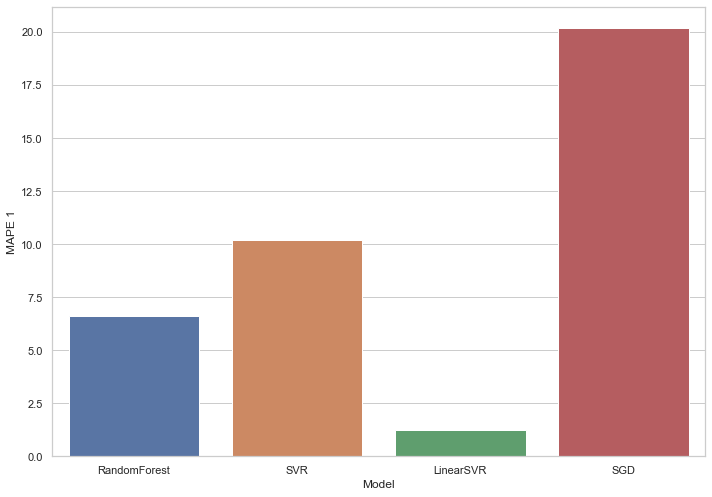

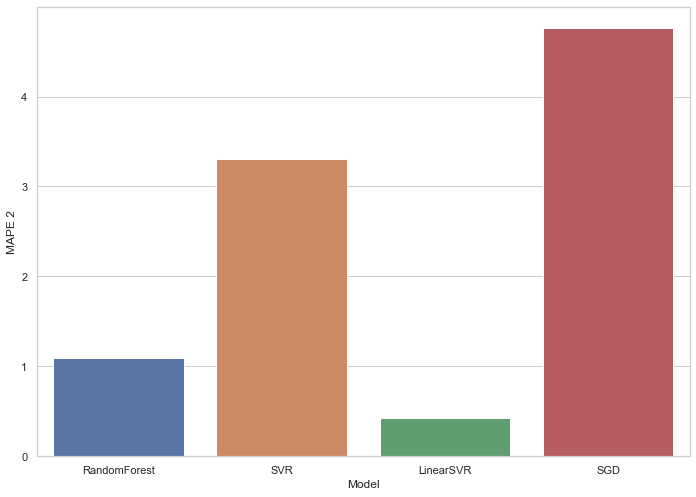

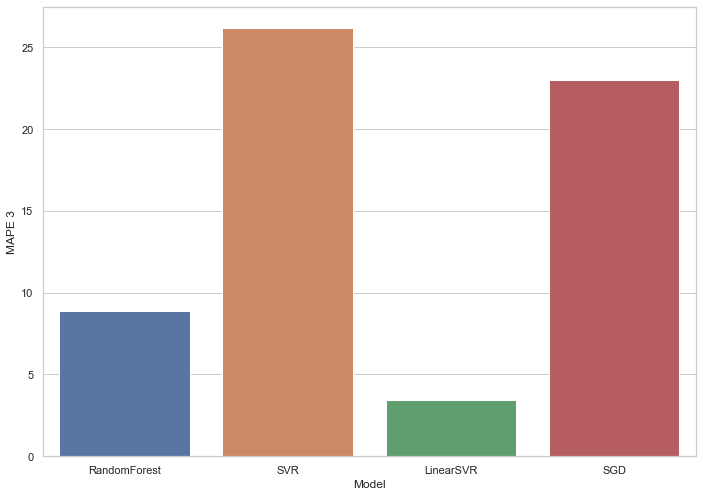

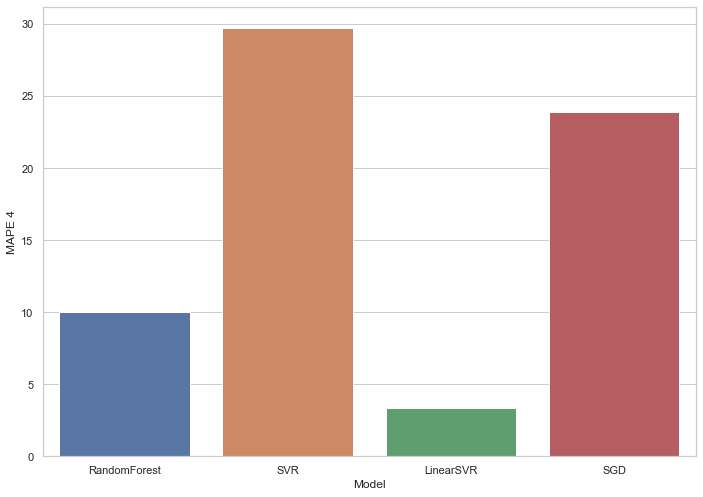

In [34]:
for column in mape_score.columns[1:]:
    visualize_plot(column)

In [35]:
mape_score

,Model,MAPE 1,MAPE 2,MAPE 3,MAPE 4
0,RandomForest,6.61,1.09,8.86,10.02
0,SVR,10.19,3.30,26.17,29.71
0,LinearSVR,1.22,0.43,3.45,3.34
0,SGD,20.18,4.76,23.01,23.89


In terms of MAPE score, LinearSVR seemed to gained the best performance among of the other models. Please note that the above score is done by predict and test using all of the available data, without using an external data. Overfitting may occur if it's applied to an external data.

### Feature Importance  
Now, I'd like to know how Random Forest chooses which variable is the most important. I choose only Random Forest because it's one of the most common model to find a feature importance.

In [36]:
# Function to find feature importance using random forest
def plot_importance():
    features = X.columns
    importances = rf_model.best_estimator_.feature_importances_

    feat_importances = pd.Series(importances, index=features)
    feat_importances.nlargest(5).plot(kind='barh')

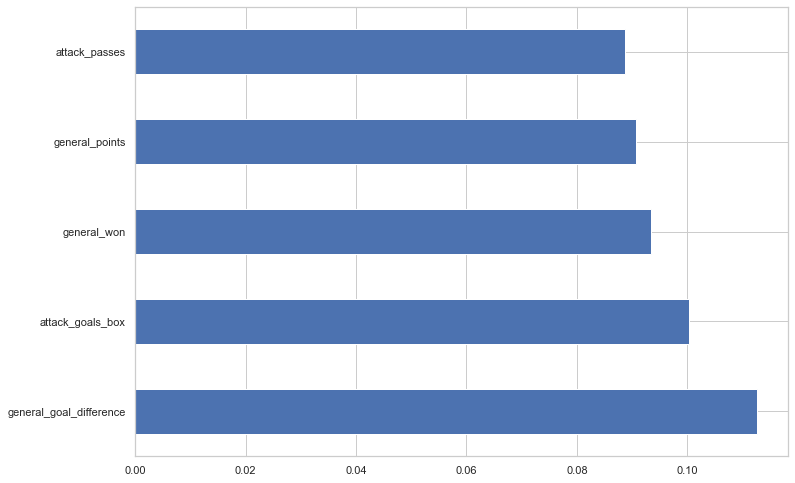

In [37]:
plot_importance()

It seems general_goal_difference considered is the most important by random forest model. Intuitively, it does make sense because it tells you the performance of a team by looking at the difference between goal scored and goal conceeded. The same thing applies for the other 4 columns as well.